In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split  as tts
import seaborn as sns

Importing the Dataset

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/healthcare.csv')

In [ ]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = data.dropna()
data = data.drop(columns = 'id')

##Data Analysis

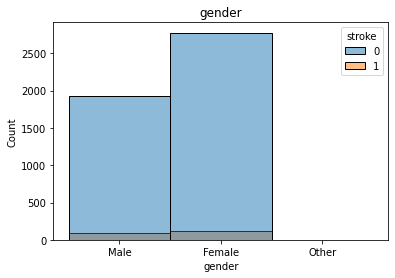

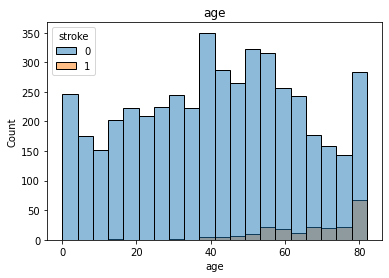

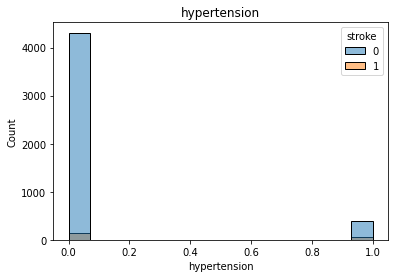

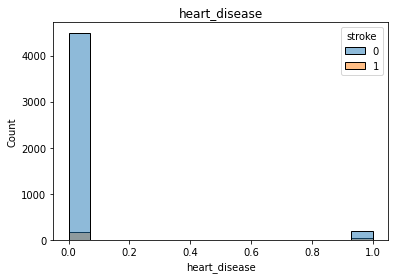

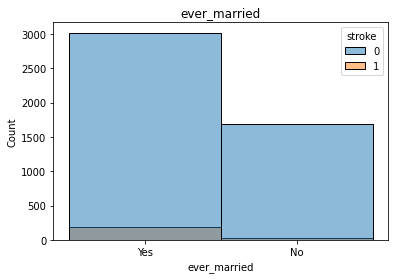

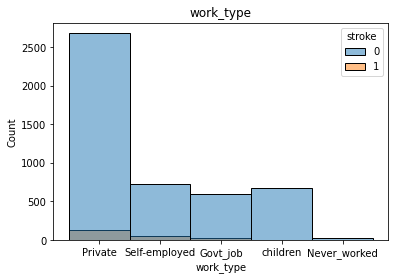

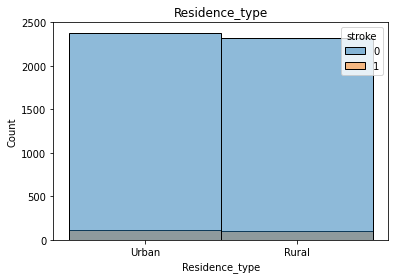

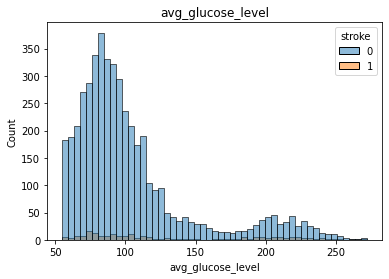

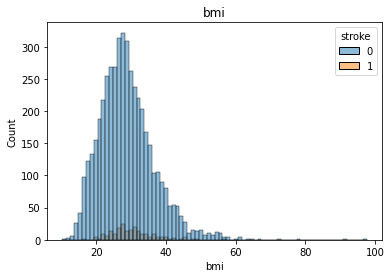

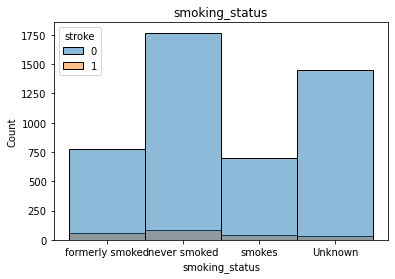

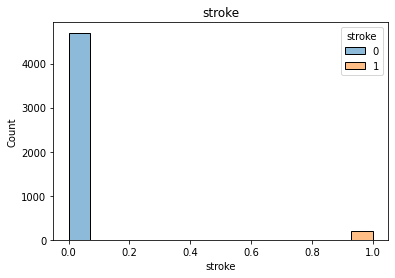

In [ ]:
for col in data.columns:
    plt.title(col)
    sns.histplot(x = col , data = data , hue = 'stroke' )
    plt.show()

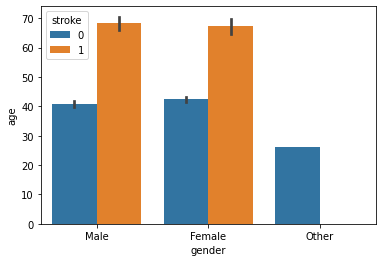

In [ ]:
sns.barplot(x = 'gender',y = 'age',hue = 'stroke',data = data)

##Encoding of Categorical Features

We performed encoding of Categorical columns using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

col = ['gender','ever_married','work_type','Residence_type','smoking_status']
for i in col:
  le = LabelEncoder()
  le.fit(data[i])
  data[i] = le.fit_transform(data[i])

In [ ]:
y = data.iloc[:,-1]

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


##Scaling of Continuous Features

Then we performed Standardization of Continuous columns using StandardScaler

In [ ]:
dcopy = data.copy(deep = True)
dcopy

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = data.copy()
 
cols = ['age', 'avg_glucose_level','bmi']
features = dcopy[cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
dcopy[cols] = features
dcopy

data = dcopy
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.070138,0,1,1,2,1,2.777698,0.981345,1,1
2,1,1.646563,0,1,1,2,0,0.013842,0.459269,2,1
3,0,0.272012,0,0,1,2,1,1.484132,0.701207,3,1
4,0,1.602222,1,0,1,3,0,1.549193,-0.623083,2,1
5,1,1.690903,0,0,1,2,1,1.821368,0.013595,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,-1.324241,0,0,0,4,0,-0.050094,-1.310695,0,0
5106,0,1.690903,0,0,1,3,1,0.447882,1.414286,2,0
5107,0,-0.348753,0,0,1,3,0,-0.502369,0.217332,2,0
5108,1,0.360692,0,0,1,2,0,1.372920,-0.419346,1,0


#Dropping unnecessary columns


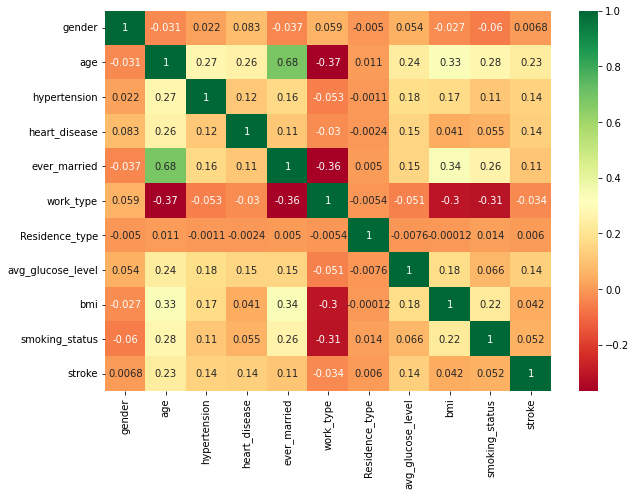

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

Dropping the columns -> bmi , Hypertension , Heart Disease and ever married . We dropped bmi because it had a lot of outlier values as evident from its graph . There was a lot of imbalance in the data in columns of Hypertension and Heart disease .We dropped ever_married because it was highly correlated to the Age column

In [ ]:
data = data.drop(columns = ['bmi' , 'hypertension' , 'heart_disease' , 'ever_married'])

In [ ]:
data.isna().sum()

gender               0
age                  0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

Splitting into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = tts(data.iloc[:, :-1], data.iloc[:,-1], test_size = 0.3, shuffle = True)

#Importing the Models

Evaluating the performance of some well known classifier models

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

In [ ]:
models = []
models.append(RFC())
models.append(ABC())
models.append(SVC(kernel = 'linear' , C = 0.1))
models.append(DecisionTreeClassifier())
models.append(xgb.XGBClassifier())
models.append(lgb.LGBMClassifier())+

models.append(KNeighborsClassifier())

In [ ]:
!pip install tabulate
from tabulate import tabulate

In [ ]:
table = [["Model" , "Training accuracy" ,"Testing accuracy" , "Testing F1 score" ]]
for i in range(len(models)):
  clf = models[i]
  clf.fit(X_train, Y_train)
  ind_reg = [clf , acc(Y_train , clf.predict(X_train)) ,  acc(Y_test , clf.predict(X_test))  , f1(Y_test , clf.predict(X_test))]
  # print(clf,' : ', acc(Y_test, clf.predict(X_test)),',' , f1(Y_test, clf.predict(X_test)))
  table.append(ind_reg)
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒═════════════════════════════╤═════════════════════╤════════════════════╤════════════════════╕
│ Model                       │   Training accuracy │   Testing accuracy │   Testing F1 score │
╞═════════════════════════════╪═════════════════════╪════════════════════╪════════════════════╡
│ RandomForestClassifier()    │            1        │           0.955193 │          0.0571429 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ AdaBoostClassifier()        │            0.958964 │           0.955193 │          0         │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ SVC(C=0.1, kernel='linear') │            0.958091 │           0.955872 │          0         │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ DecisionTreeClassifier()    │            1        │           0.911066 │          0.0839161 │
├─────────────────────────────┼─────────

We can see that precision and F1 score  are very small in all places because the number of datapoints for 1s are very less as compared to 0s. So for equally training 1s class labels, we used oversampling on the train data  using RandomOverSampler . This increases the number of datapoints of 1s class equal to the number of 0s class. This will help train 1s class equally

#Oversampling on training data

In [ ]:
! pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

In [ ]:
Y.value_counts()

0    3292
1    3292
Name: stroke, dtype: int64

In [ ]:
table = [["Model" , "Training accuracy" ,"Testing accuracy" , "Testing F1 score" ]]
for i in range(len(models)):
  clf = models[i]
  clf.fit(X, Y)
  ind_reg = [clf , acc(Y , clf.predict(X)) ,  acc(Y_test , clf.predict(X_test))  , f1(Y_test , clf.predict(X_test))]
  # print(clf,' : ', acc(Y_test, clf.predict(X_test)),',' , f1(Y_test, clf.predict(X_test)))
  table.append(ind_reg)
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒═════════════════════════════╤═════════════════════╤════════════════════╤════════════════════╕
│ Model                       │   Training accuracy │   Testing accuracy │   Testing F1 score │
╞═════════════════════════════╪═════════════════════╪════════════════════╪════════════════════╡
│ RandomForestClassifier()    │            1        │           0.941616 │          0.0851064 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ AdaBoostClassifier()        │            0.805589 │           0.712152 │          0.2       │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ SVC(C=0.1, kernel='linear') │            0.765036 │           0.734555 │          0.21328   │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ DecisionTreeClassifier()    │            1        │           0.912424 │          0.110345  │
├─────────────────────────────┼─────────

The F1 scores have increased a bit, but are still less so we tried applying oversampling on whole data, rather than training data

#Oversampling on whole data

We tried performing Oversampling on the whole data , but it is wrong as we will be testing the model on manipulated data so it may perform poorly on unseen data.

In [ ]:
ros = RandomOverSampler(random_state=0)
Xw, Yw = ros.fit_resample(data.iloc[:, :-1], data.iloc[:,-1])


In [ ]:
Yw.value_counts()

1    4700
0    4700
Name: stroke, dtype: int64

In [ ]:
Xw_train, Xw_test, Yw_train, Yw_test = tts(Xw, Yw, test_size = 0.3, shuffle = True)

In [ ]:
table = [["Model" , "Training accuracy" ,"Testing accuracy" , "Testing F1 score" ]]
for i in range(len(models)):
  clf = models[i]
  clf.fit(Xw_train, Yw_train)
  ind_reg = [clf , acc(Yw_train , clf.predict(Xw_train)) ,  acc(Yw_test , clf.predict(Xw_test))  , f1(Yw_test , clf.predict(Xw_test))]
  # print(clf,' : ', acc(Y_test, clf.predict(X_test)),',' , f1(Y_test, clf.predict(X_test)))
  table.append(ind_reg)
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒═════════════════════════════╤═════════════════════╤════════════════════╤════════════════════╕
│ Model                       │   Training accuracy │   Testing accuracy │   Testing F1 score │
╞═════════════════════════════╪═════════════════════╪════════════════════╪════════════════════╡
│ RandomForestClassifier()    │            1        │           0.987234 │           0.987612 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ AdaBoostClassifier()        │            0.799848 │           0.799645 │           0.812479 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ SVC(C=0.1, kernel='linear') │            0.759574 │           0.763121 │           0.771389 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ DecisionTreeClassifier()    │            1        │           0.97695  │           0.977853 │
├─────────────────────────────┼─────────

LGBM Classifier has performed considerably well in all the three cases . So We decided to perform its hyperparameter tuning to furthur enhance its performance

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve as roc

In [ ]:
mdl_rf = lgb.LGBMClassifier()
params_li = { 'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth' : list(range(30,50)) }
rf_gs = GridSearchCV(estimator=mdl_rf, param_grid = params_li , cv= 3 )

In [ ]:
rf_gs.fit(Xw_train, Yw_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'max_depth': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000]})

In [ ]:
rf_gs.best_params_

{'max_depth': 30, 'n_estimators': 1000}

In [ ]:
mdl_best = rf_gs.best_estimator_

In [ ]:
table = [["Data" , "Training accuracy" ,"Testing accuracy" , "Testing F1 score" , "Testing AUC" ]]
mdl_best.fit(X_train , Y_train)
y_pred = mdl_best.predict(X_test)
table.append(["Unsampled Data" , acc(Y_train ,mdl_best.predict(X_train)) , acc(Y_test , y_pred) ,f1(Y_test , y_pred) , auc(Y_test , mdl_best.predict_proba(X_test)[:,1])] )
y_predprob_unsampled = mdl_best.predict_proba(X_test)[:,1]


In [ ]:
mdl_best.fit(X , Y)
y_pred = mdl_best.predict(X_test)
table.append(["Oversampled (training only)" , acc(Y ,mdl_best.predict(X)) , acc(Y_test , y_pred) ,f1(Y_test , y_pred) , auc(Y_test , mdl_best.predict_proba(X_test)[:,1])] )
y_predprob_sampled_tr = mdl_best.predict_proba(X_test)[:,1]


In [ ]:
mdl_best.fit(Xw_train , Yw_train)
y_pred = mdl_best.predict(Xw_test)
table.append(["Oversampled (whole data)" , acc(Yw_train ,mdl_best.predict(Xw_train)) , acc(Yw_test , y_pred) ,f1(Yw_test , y_pred) , auc(Yw_test , mdl_best.predict_proba(Xw_test)[:,1])] )
y_predprob_sampled_whole = mdl_best.predict_proba(Xw_test)[:,1]

In [ ]:
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒═════════════════════════════╤═════════════════════╤════════════════════╤════════════════════╤═══════════════╕
│ Data                        │   Training accuracy │   Testing accuracy │   Testing F1 score │   Testing AUC │
╞═════════════════════════════╪═════════════════════╪════════════════════╪════════════════════╪═══════════════╡
│ Unsampled Data              │            0.999709 │           0.941616 │          0.0851064 │      0.713254 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┼───────────────┤
│ Oversampled (training only) │            0.999848 │           0.936864 │          0.0412371 │      0.750098 │
├─────────────────────────────┼─────────────────────┼────────────────────┼────────────────────┼───────────────┤
│ Oversampled (whole data)    │            0.999696 │           0.982979 │          0.98355   │      0.99806  │
╘═════════════════════════════╧═════════════════════╧════════════════════╧════════════════════╧═════════

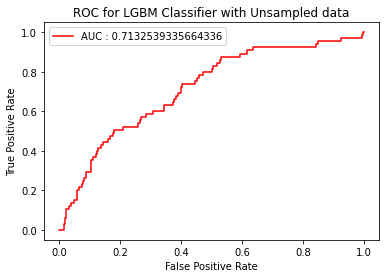

In [ ]:
fpr , tpr , _ = roc(Y_test , y_predprob_unsampled)
plt.plot(fpr,tpr , label = "AUC : " +  str(auc(Y_test , y_predprob_unsampled)) , color = 'r')
plt.title("ROC for LGBM Classifier with Unsampled data")
plt.xlabel("False Positive Rate")
plt.legend()
plt.ylabel("True Positive Rate")
plt.show()

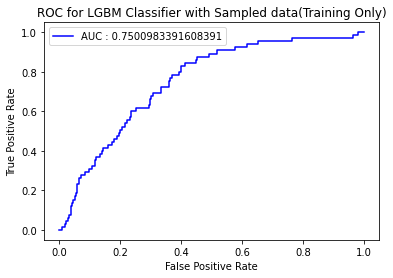

In [ ]:
fpr , tpr , _ = roc(Y_test , y_predprob_sampled_tr)
plt.plot(fpr,tpr , label = "AUC : " +  str(auc(Y_test , y_predprob_sampled_tr)) , color = 'b')
plt.title("ROC for LGBM Classifier with Sampled data(Training Only)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

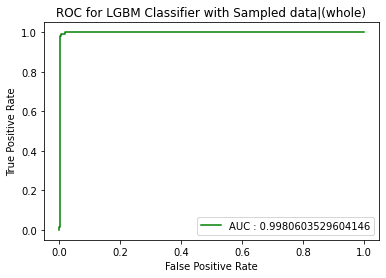

In [ ]:
fpr , tpr , _ = roc(Yw_test , y_predprob_sampled_whole)
plt.plot(fpr,tpr , label = "AUC : " +  str(auc(Yw_test , y_predprob_sampled_whole)) , color = 'g')
plt.title("ROC for LGBM Classifier with Sampled data|(whole)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#NN

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle
from torchsummary import summary

In [ ]:
def get_accuracy(logit, target, batch_size):
    
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
X_train=X_train.values
Y_train=Y_train.values


In [ ]:
batch_size = 30 
num_epochs = 1000
learning_rate = 0.01
size_hidden_1 = 200 
size_hidden_2 = 200 
num_classes = 2

batch_no = len(X_train) // batch_size  

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, size_hidden_2, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        self.hidden_layer_2 = torch.nn.Linear(size_hidden_1, size_hidden_2)   # hidden layer
        self.activation_2 = torch.nn.Tanh() # activation layer
        
        self.output_layer = torch.nn.Linear(size_hidden_2, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activation_1(self.hidden_layer_1(x))      # activation function for hidden layer
        x = self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        x = self.output_act(self.output_layer(x))                    # output
        return x

net = Net(6, size_hidden_1, size_hidden_2, num_classes)
summary(net, (1,6))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 200]           1,400
              Tanh-2               [-1, 1, 200]               0
            Linear-3               [-1, 1, 200]          40,200
              Tanh-4               [-1, 1, 200]               0
            Linear-5                 [-1, 1, 2]             402
           Sigmoid-6                 [-1, 1, 2]               0
Total params: 42,002
Trainable params: 42,002
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.16
Estimated Total Size (MB): 0.17
----------------------------------------------------------------


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, Y_train = shuffle(X_train, Y_train)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.LongTensor(Y_train[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()
               
        outputs = net(inputs)
        
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        val = get_accuracy(outputs, labels, batch_size)
        train_acc += val
      
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 | Loss: 0.4952 | Train Accuracy: 95.67
Epoch: 2 | Loss: 0.3950 | Train Accuracy: 95.94
Epoch: 3 | Loss: 0.3771 | Train Accuracy: 95.94
Epoch: 4 | Loss: 0.3699 | Train Accuracy: 95.94
Epoch: 5 | Loss: 0.3661 | Train Accuracy: 95.94
Epoch: 6 | Loss: 0.3632 | Train Accuracy: 95.99
Epoch: 7 | Loss: 0.3622 | Train Accuracy: 95.94
Epoch: 8 | Loss: 0.3610 | Train Accuracy: 95.94
Epoch: 9 | Loss: 0.3593 | Train Accuracy: 96.02
Epoch: 10 | Loss: 0.3591 | Train Accuracy: 95.96
Epoch: 11 | Loss: 0.3583 | Train Accuracy: 95.99
Epoch: 12 | Loss: 0.3581 | Train Accuracy: 95.96
Epoch: 13 | Loss: 0.3580 | Train Accuracy: 95.94
Epoch: 14 | Loss: 0.3574 | Train Accuracy: 95.96
Epoch: 15 | Loss: 0.3574 | Train Accuracy: 95.94
Epoch: 16 | Loss: 0.3572 | Train Accuracy: 95.94
Epoch: 17 | Loss: 0.3561 | Train Accuracy: 96.02
Epoch: 18 | Loss: 0.3568 | Train Accuracy: 95.94
Epoch: 19 | Loss: 0.3566 | Train Accuracy: 95.94
Epoch: 20 | Loss: 0.3565 | Train Accuracy: 95.94
Epoch: 21 | Loss: 0.3564 | Tr

The training Accuracy for neural network is not that good compared to other models so we decided to drop it

#Pipeline

Implementing a pipeline with LabelEncoder and StandardScaler for preprocessing and LGBM Classifier as the classification model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.base import TransformerMixin
class preprocess(BaseEstimator , TransformerMixin):
  def __init__(self):
    print("init() function called")

  def fit(self , X , y = None):
    print("fit() function called")
    return self
  def transform(self , X , y = None):
    X = X.drop(columns = ['bmi' , 'hypertension' , 'heart_disease' , 'ever_married' , 'id'])
    continuous_columns = ['age', 'avg_glucose_level']
    categorical_columns = ['gender','work_type','Residence_type','smoking_status']
    scaler = StandardScaler()
    le = LabelEncoder()
    X[continuous_columns] = scaler.fit_transform(X[continuous_columns])
    for col in categorical_columns:
      X[col] = le.fit_transform(X[col])
    
    return X


In [ ]:
pl = Pipeline([ ('preprocess' , preprocess()), ('classifier', rf_gs.best_estimator_) ])
new_data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
new_data = new_data.dropna()
x_train , x_test, y_train , y_test = tts(new_data.drop(columns = 'stroke') , new_data.stroke , test_size = 0.3 , shuffle = True)
# print(x_train)
pl.fit(x_train, y_train)
y_pred = pl.predict(x_test)

init() function called
fit() function called


In [ ]:
a , b = np.unique(y_pred , return_counts = True)
print("Number of 0s and 1s in the predicted data is : " , b)
a , b = np.unique(y_test , return_counts = True)
print("Number of 0s and 1s in the actual testing data is : " ,b)
print("Accuracy : " , acc(y_test , y_pred ))
print("F1 Score : " , f1( y_test , y_pred))

Number of 0s and 1s in the predicted data is :  [1439   34]
Number of 0s and 1s in the predicted data is :  [1406   67]
Accuracy :  0.9368635437881874
F1 Score :  0.07920792079207921


In [ ]:
set_config(display="diagram")
pl

Pipeline(steps=[('preprocess', preprocess()),
                ('classifier', LGBMClassifier(max_depth=30, n_estimators=900))])